# BUSINESS PROBLEM

# Churn Prediction Analysis 

Focused on customer retention programs

# What is the business model?

Analysis of customers retentions on privates programs.

# What is the business problem the company is facing?

TopBank is a large banking services company. It operates mainly in European countries offering financial products, from bank accounts to investments, as well as some types of insurance and investment products.
The business model of the company is service-oriented, i.e. it sells banking services to its customers through physical branches and an online portal.

The company's main product is a bank account, in which the client can deposit his salary, make withdrawals, deposits and transfer to other accounts. This bank account has no cost for the client and is valid for 12 months, that is, the client needs to renew the contract of this account to continue using for the next 12 months.

According to the TopBank Analytics team, each client who has this bank account returns a monetary value of 15% of their estimated salary. If the estimated salary is higher than the average, it returns 20% of that value during the current account period. This value is calculated annually.

For example, if a client's monthly salary is 1000 euros and the average of all bank salaries is 800 euros, the company therefore invoices 200 euros annually with this client. If this client is in the bank for 10 years, the company has already invoiced 2000 euros with its transactions and use of the account.

In recent months, the Analytics team has noticed that clients have been canceling their accounts and leaving the bank. This has reached unprecedented numbers in the company. Concerned with this rate increase, the team planned an action plan to decrease the rate of **evasion of clients**, also known as **Churn**.


> In general, Churn is a metric that indicates the **number of customers who have cancelled their contract or stopped purchasing their product** in a certain period of time. For example, customers who have cancelled their service contract or after its expiration have not renewed, are customers considered in churn.


# PROBLEM UNDERSTANDING

What is the business solution that this project has to deliver? As a data science consultant, you have to create a highly precise and accurate model for predicting churn rate and identifying those customers are leaving.

At the end of your consultancy, you need to provide the CEO of Analysis of churn prediction model in production that will be accessed via API, meaning that clients will send their transactions via API for your model to classify the customers .

In addition, you will need to submit a report with the model's performance and results and the analysis of investiments that the company will make using the model that you created and developed to maintain more churn customers identify from the model. Your report should contain the answers to the following questions:

    1) What is the current churn rate of the company?
    
    2) How well does the model perform in classifying customers as churn?
    
    3) What is the expected revenue return if the company uses its model to prevent customer churn?
    
    4) For which customers would you provide a financial incentive, and what would be the value in order to maximize the ROI (Return on Investment)?
    
    5) What is the expected return, in terms of invoicing, if the company uses the model to avoid the Churn of the clients?

Source data set: https://www.kaggle.com/datasets/mervetorkan/churndataset



| Feature        | Description                                                                                                                                                                                                                                                                                           |
|:----------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| RowNumber      | corresponds to the record (row) number and has no effect on the output.\)\.                                                                                                                                                                              |
| CustomerId     | the surname of a customer has no impact on their decision to leave the bank.\)                                                                                                                                                                                                                                 |
| Surname        | the surname of a customer has no impact on their decision to leave the bank.                                                                                                                                                                                                                                                           |
| CreditScore    | can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.                                                                                                                                                                                                                                                                 |
| Geography  |  customer’s location can affect their decision to leave the bank.                                                                                                                                                                                                                                                                |
|  Gender     |  it’s interesting to explore whether gender plays a role in a customer leaving the bank.                                                                                                                                                                                                                                                                     |
|   Age       | this is certainly relevant, since older customers are less likely to leave their bank than younger ones.                                                                                                                                                                                                                                                      |
| Tenure:  | refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.                                                                                                                                                                   |
| Balance | also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.                                                                                                                                                                       |
| NumOfProducts        | refers to the number of products that a customer has purchased through the bank |
| HasCrCard  | denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
| IsActiveMember       | active customers are less likely to leave the bank. |
| EstimatedSalary       | as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries. |
| Exited      |  whether or not the customer left the bank. (0=No,1=Yes) |

## IOT Method Solution Strategy

In [24]:
pwd

'/home/ehgeraldo/repos/Churn_Prediction/images'

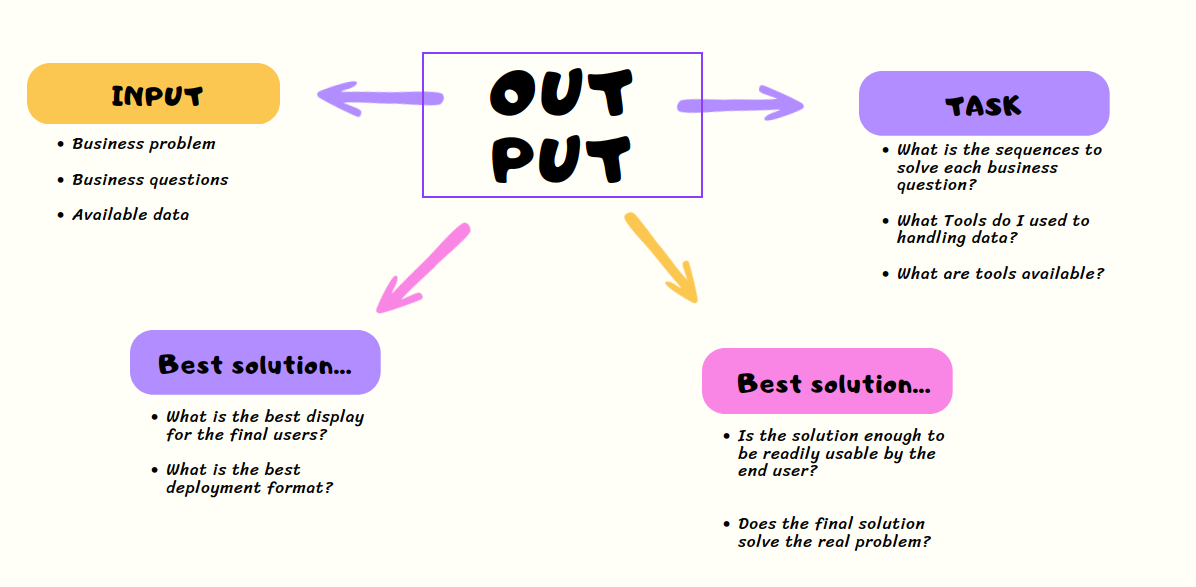

In [25]:
from IPython.display       import Image
Image( 'IOT_Method_Solution.png', width=1000 )

# SOLUTION STRATEGY


### INPUT

   * Business problem: churn rate identification.
   * Business questions: described in the preceding section
   * Available data: dataset with information from sales transactions.
        
        
### OUTPUT

   * An API to classify clients transactions.
   * A dashboard with reporting information about the following business questions:

   * What is the precision and accuracy of the model?
   
   * What is the expected revenue for the cases where the model succeed in detecting churn customers?
   
   * What is the expected loss by the company for the cases where the model not be implement?
   
   * What is the expected on the investiments for retention churn customers identify from the model that received dicount coupons?
    

### TASKs
Create an API to classify clients transactions.

   * Create a machine learning classification model
   * Create an API to respond to clients requests
   * Host API on a cloud service

# PROJECT SOLUTION CYCLE

In [ ]:
cd ..

In [8]:
cd images

/home/ehgeraldo/repos/Churn_Prediction/images


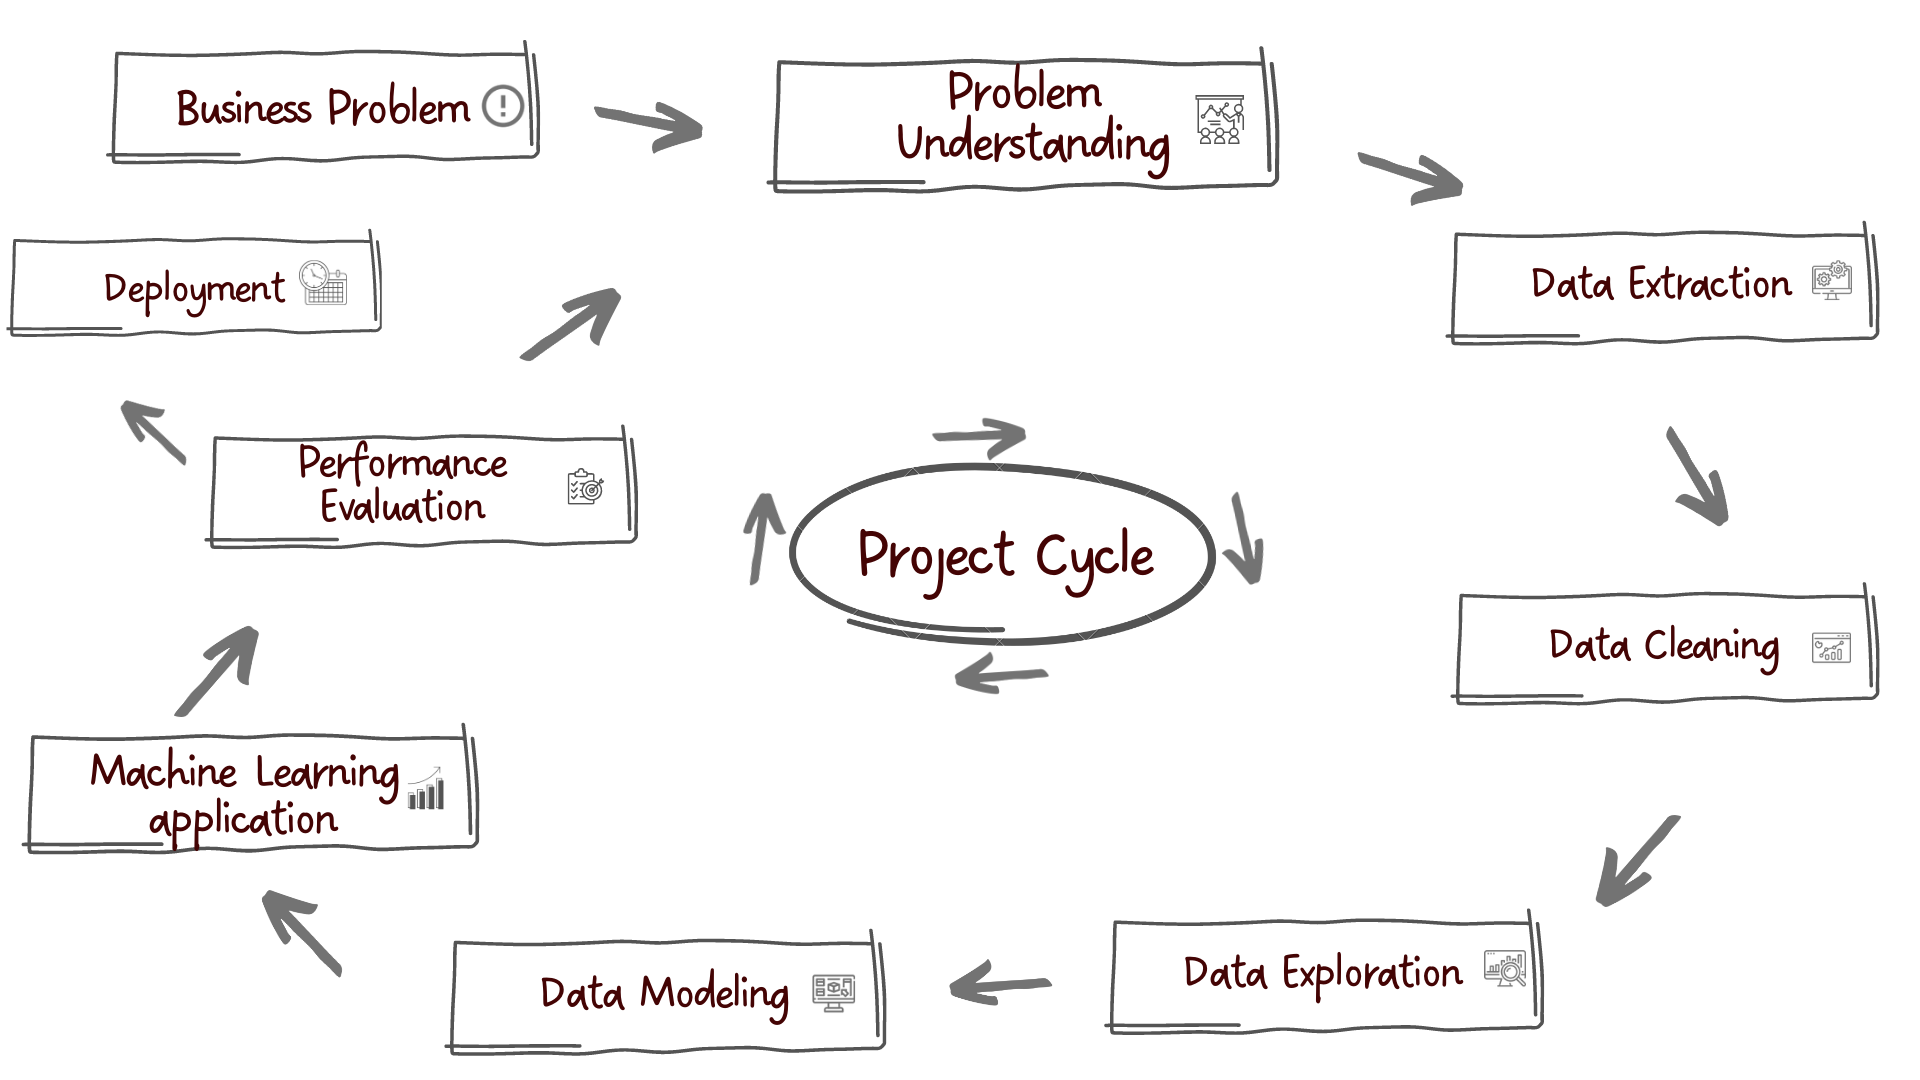

In [9]:
Image( 'Project_Cicles.png', width=1000 )

# HYPOTHESIS MIND MAP

In [10]:
pwd

'/home/ehgeraldo/repos/Churn_Prediction/images'

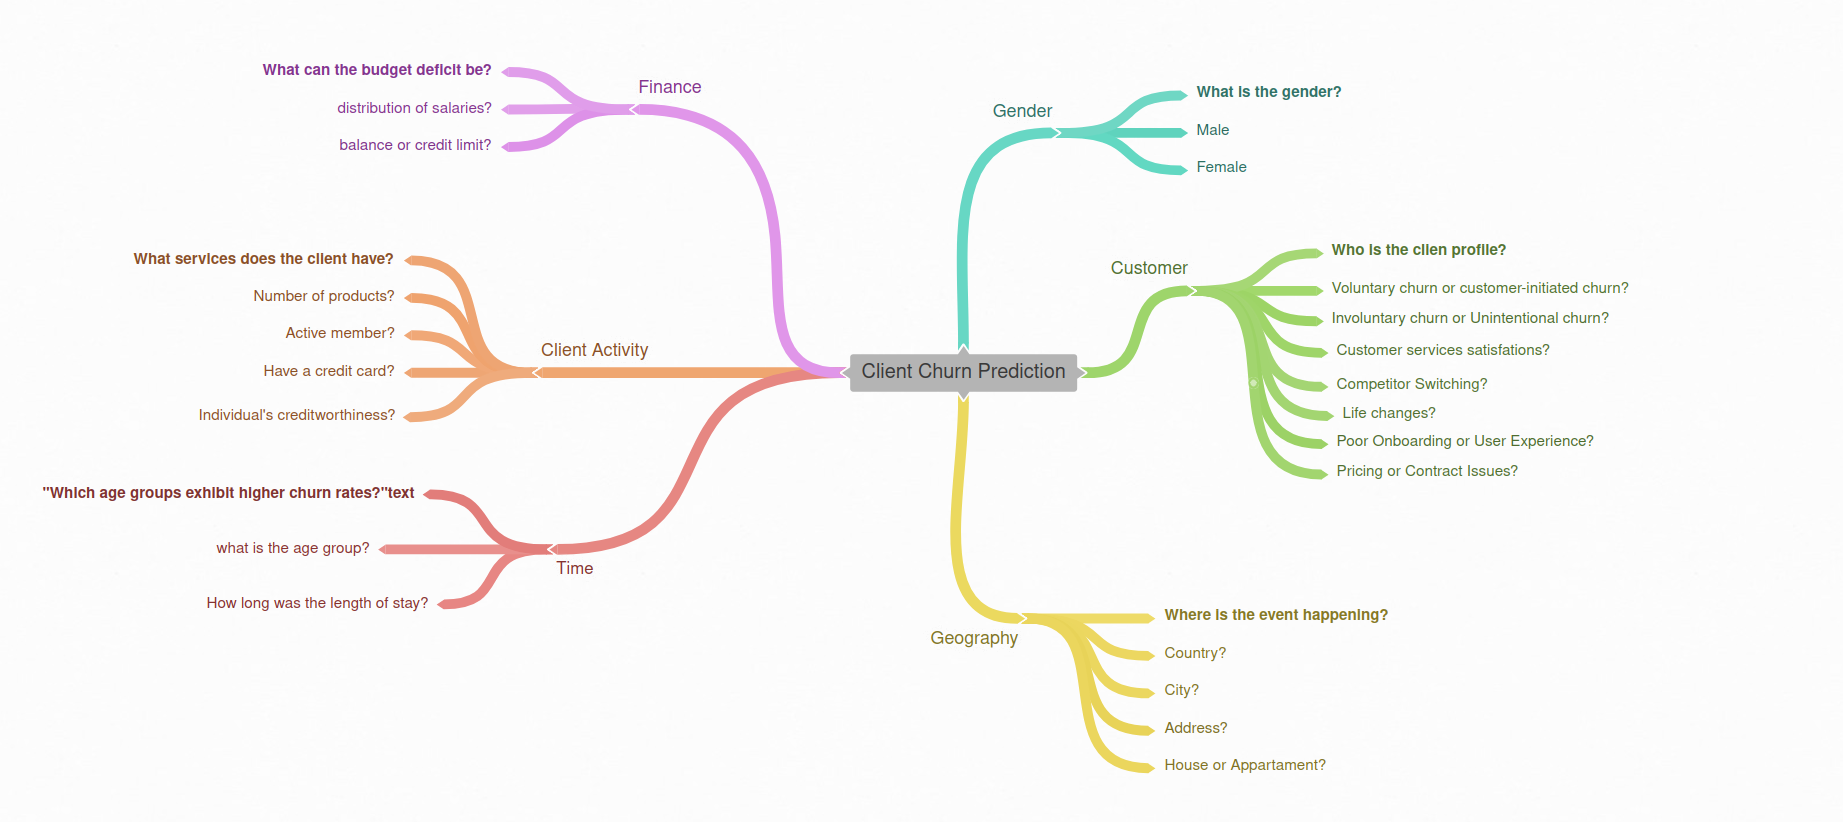

In [11]:
from IPython.display       import Image
Image( 'Hypothesis_Map.png', width=1000 )

# 0.0 Imports

In [12]:
import pandas as pd
import inflection

# Helper Function

In [13]:
def check_dataframe( dataframe, sample_size = 3 ):
    '''
    Print number of NAs, percentage of NA to the given column,
    number of unique values, data types, dataframe shape and 
    return a random sample of dataframe'''
    
    # create dictionary with descriptive information
    dict_data = {'Num NAs':     dataframe.isna().sum(),
                 'Percent NAs': dataframe.isna().mean(),
                 'Num unique':  dataframe.nunique(),
                 'Data Type':   dataframe.dtypes }
  
    # print descriptive data
    print( pd.DataFrame( dict_data ), '\n' )
    # print dataframe shape
    print( f'Dataframe shape is {dataframe.shape}', '\n' )  
    
    
    return dataframe.sample( sample_size )


# Loading Data

In [14]:
pwd

'/home/ehgeraldo/repos/Churn_Prediction/images'

In [15]:
df_raw = pd.read_csv('/home/ehgeraldo/repos/Churn_Prediction/data/churn.csv', low_memory=False)

In [16]:
df_raw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Description

In [17]:
df1 = df_raw.copy()

# Data dimensions

In [18]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 10000
Number of Columns: 14


# Rename Columns

In [19]:
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [20]:
cols_old = ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']

snakecase = lambda x: inflection.underscore(x)

cols_news = list(map(snakecase, cols_old))

df1.columns = cols_news

In [21]:
df1.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data types

In [22]:
check_dataframe( df1 )

                  Num NAs  Percent NAs  Num unique Data Type
row_number              0          0.0       10000     int64
customer_id             0          0.0       10000     int64
surname                 0          0.0        2932    object
credit_score            0          0.0         460     int64
geography               0          0.0           3    object
gender                  0          0.0           2    object
age                     0          0.0          70     int64
tenure                  0          0.0          11     int64
balance                 0          0.0        6382   float64
num_of_products         0          0.0           4     int64
has_cr_card             0          0.0           2     int64
is_active_member        0          0.0           2     int64
estimated_salary        0          0.0        9999   float64
exited                  0          0.0           2     int64 

Dataframe shape is (10000, 14) 



,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
5983,5984,15767891,Findlay,619,Germany,Female,28,6,99152.73,2,1,0,48475.12,0
3181,3182,15663249,Howells,575,Spain,Female,37,9,133292.45,1,1,0,111175.09,0
6527,6528,15722692,Kazakova,464,France,Male,38,3,116439.65,1,1,0,75574.48,0


In [23]:
df1.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')